In [11]:
import pandas as pd
import pandas_datareader.data as data
start = '1965-01-05'
end = '2021-10-21'
df = data.DataReader('^NKX', 'stooq', start, end)
df.to_csv('finance_dataset.csv')

In [12]:
df = pd.read_csv('finance_dataset.csv')
df

,Date,Open,High,Low,Close,Volume
0,2021-10-21,29152.74,29220.72,28689.05,28708.58,591458200.0
1,2021-10-20,29385.95,29489.11,29222.32,29255.55,661082500.0
2,2021-10-19,29117.28,29272.49,29076.34,29215.52,576447900.0
3,2021-10-18,29093.82,29144.33,28925.32,29025.46,625648900.0
4,2021-10-15,28787.26,29082.35,28726.22,29068.63,663478700.0
...,...,...,...,...,...,...
14141,1965-01-09,1278.32,1278.32,1278.32,1278.32,NaN
14142,1965-01-08,1286.43,1286.43,1286.43,1286.43,NaN
14143,1965-01-07,1274.27,1274.27,1274.27,1274.27,NaN
14144,1965-01-06,1263.99,1263.99,1263.99,1263.99,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    14146 non-null  object 
 1   Open    14146 non-null  float64
 2   High    14146 non-null  float64
 3   Low     14146 non-null  float64
 4   Close   14146 non-null  float64
 5   Volume  4746 non-null   float64
dtypes: float64(5), object(1)
memory usage: 663.2+ KB


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14146 entries, 0 to 14145
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14146 non-null  datetime64[ns]
 1   Open    14146 non-null  float64       
 2   High    14146 non-null  float64       
 3   Low     14146 non-null  float64       
 4   Close   14146 non-null  float64       
 5   Volume  4746 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 663.2 KB


In [15]:
# 曜日情報を追加（月曜:0, 火曜:1, 水曜:2, 木曜:3, 金曜:4, 土曜:5, 日曜:6）
df['weekday'] = df['Date'].dt.weekday
df

,Date,Open,High,Low,Close,Volume,weekday
0,2021-10-21,29152.74,29220.72,28689.05,28708.58,591458200.0,3
1,2021-10-20,29385.95,29489.11,29222.32,29255.55,661082500.0,2
2,2021-10-19,29117.28,29272.49,29076.34,29215.52,576447900.0,1
3,2021-10-18,29093.82,29144.33,28925.32,29025.46,625648900.0,0
4,2021-10-15,28787.26,29082.35,28726.22,29068.63,663478700.0,4
...,...,...,...,...,...,...,...
14141,1965-01-09,1278.32,1278.32,1278.32,1278.32,NaN,5
14142,1965-01-08,1286.43,1286.43,1286.43,1286.43,NaN,4
14143,1965-01-07,1274.27,1274.27,1274.27,1274.27,NaN,3
14144,1965-01-06,1263.99,1263.99,1263.99,1263.99,NaN,2


In [16]:
# 初めの月曜日となる1965-01-04のデータを基準に週を定義
from datetime import datetime, timedelta
start = datetime(1965, 1, 4)
df['weeks'] = (df['Date'] - start) // timedelta(weeks=1)
df

,Date,Open,High,Low,Close,Volume,weekday,weeks
0,2021-10-21,29152.74,29220.72,28689.05,28708.58,591458200.0,3,2963
1,2021-10-20,29385.95,29489.11,29222.32,29255.55,661082500.0,2,2963
2,2021-10-19,29117.28,29272.49,29076.34,29215.52,576447900.0,1,2963
3,2021-10-18,29093.82,29144.33,28925.32,29025.46,625648900.0,0,2963
4,2021-10-15,28787.26,29082.35,28726.22,29068.63,663478700.0,4,2962
...,...,...,...,...,...,...,...,...
14141,1965-01-09,1278.32,1278.32,1278.32,1278.32,NaN,5,0
14142,1965-01-08,1286.43,1286.43,1286.43,1286.43,NaN,4,0
14143,1965-01-07,1274.27,1274.27,1274.27,1274.27,NaN,3,0
14144,1965-01-06,1263.99,1263.99,1263.99,1263.99,NaN,2,0


In [17]:
# カラムの並び替え
df = df[['Date', 'weeks', 'weekday', 'High', 'Low', 'Open', 'Close']]
df

,Date,weeks,weekday,High,Low,Open,Close
0,2021-10-21,2963,3,29220.72,28689.05,29152.74,28708.58
1,2021-10-20,2963,2,29489.11,29222.32,29385.95,29255.55
2,2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52
3,2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46
4,2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63
...,...,...,...,...,...,...,...
14141,1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32
14142,1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43
14143,1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27
14144,1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99


In [18]:
# データの並び替え
df.sort_values(by='Date', ascending=True, inplace=True)

# 日付をインデックスにセット
df.set_index(keys='Date', inplace=True)
df

<ipython-input-18-6a72bf085514>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Date', ascending=True, inplace=True)


,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32
...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52


In [19]:
# 絡む情報を1行上にずらしたデータフレームを作成
df_shift = df.shift(-1)
df_shift

,weeks,weekday,High,Low,Open,Close
Date,,,,,,
1965-01-05,0.0,2.0,1263.99,1263.99,1263.99,1263.99
1965-01-06,0.0,3.0,1274.27,1274.27,1274.27,1274.27
1965-01-07,0.0,4.0,1286.43,1286.43,1286.43,1286.43
1965-01-08,0.0,5.0,1278.32,1278.32,1278.32,1278.32
1965-01-09,1.0,0.0,1289.98,1289.98,1289.98,1289.98
...,...,...,...,...,...,...
2021-10-15,2963.0,0.0,29144.33,28925.32,29093.82,29025.46
2021-10-18,2963.0,1.0,29272.49,29076.34,29117.28,29215.52
2021-10-19,2963.0,2.0,29489.11,29222.32,29385.95,29255.55


In [20]:
# 翌日の終値と本日の終値の差分を計算
df['delta_Close'] = df_shift['Close'] - df['Close']
df

<ipython-input-20-d3cd15a3ce15>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delta_Close'] = df_shift['Close'] - df['Close']


,weeks,weekday,High,Low,Open,Close,delta_Close
Date,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,6.27
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,10.28
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,12.16
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,-8.11
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,11.66
...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,-43.17
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,190.06
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,40.03


In [21]:
# 目的変数Upを追加（翌日の始値が上がる場合を1、それ以外を0とする）
df['Up'] = 0
df['Up'][df['delta_Close'] > 0] = 1
df = df.drop('delta_Close', axis=1)
df

<ipython-input-21-bcefb9ff8df4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Up'][df['delta_Close'] > 0] = 1


,weeks,weekday,High,Low,Open,Close,Up
Date,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,0
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1
...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,0
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,1
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,1


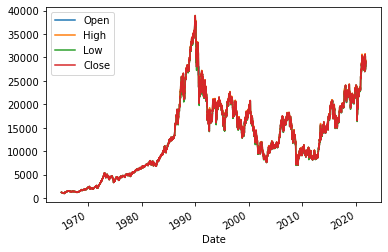

In [22]:
# 'Open', 'High', 'Low', 'Close'の4つのカラムを抽出
df_new = df[['Open', 'High', 'Low', 'Close']]

from matplotlib import pyplot as plt
%matplotlib inline

# 時系列折れ線グラグを描画
df_new.plot(kind='line')
plt.show()

In [23]:
# 終値の前日比を計算
df_shift = df.shift(1)

df['Close_ratio'] = (df['Close'] - df_shift['Close']) / df_shift['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio
Date,,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1,NaN
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1,0.004985
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1,0.008133
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,0,0.009543
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1,-0.006304
...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,0,0.018133
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,1,-0.001485
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,1,0.006548


In [24]:
# 始値と終値の差分を計算
df['Body'] = df['Open'] - df['Close']
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body
Date,,,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1,NaN,0.00
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1,0.004985,0.00
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1,0.008133,0.00
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,0,0.009543,0.00
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1,-0.006304,0.00
...,...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,0,0.018133,-281.37
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,1,-0.001485,68.36
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,1,0.006548,-98.24


In [25]:
# 週番号を抽出
list_weeks = []
list_weeks = df['weeks'].unique()
list_weeks

array([   0,    1,    2, ..., 2961, 2962, 2963])

In [26]:
# 各週毎の日数をカウント
df['week_days'] = 0
for i in list_weeks:
    df.loc[df['weeks'] == i, 'week_days'] = len(df[df['weeks'] == i])
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1,NaN,0.00,5
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1,0.004985,0.00,5
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1,0.008133,0.00,5
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,0,0.009543,0.00,5
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1,-0.006304,0.00,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-15,2962,4,29082.35,28726.22,28787.26,29068.63,0,0.018133,-281.37,5
2021-10-18,2963,0,29144.33,28925.32,29093.82,29025.46,1,-0.001485,68.36,4
2021-10-19,2963,1,29272.49,29076.34,29117.28,29215.52,1,0.006548,-98.24,4


In [27]:
# 月曜から金曜まで5日分のデータがある週だけを抽出
df = df[df['week_days'] == 5]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1,NaN,0.00,5
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1,0.004985,0.00,5
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1,0.008133,0.00,5
1965-01-08,0,4,1286.43,1286.43,1286.43,1286.43,0,0.009543,0.00,5
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1,-0.006304,0.00,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-11,2962,0,28581.36,27899.66,27977.57,28498.20,0,0.016017,-520.63,5
2021-10-12,2962,1,28468.88,28166.38,28458.88,28230.61,0,-0.009390,228.27,5
2021-10-13,2962,2,28364.99,27993.46,28085.44,28140.28,1,-0.003200,-54.84,5


In [28]:
# 金曜日のデータを削除（weekday:4は削除）
df = df[df['weekday'] != 4]
df

,weeks,weekday,High,Low,Open,Close,Up,Close_ratio,Body,week_days
Date,,,,,,,,,,
1965-01-05,0,1,1257.72,1257.72,1257.72,1257.72,1,NaN,0.00,5
1965-01-06,0,2,1263.99,1263.99,1263.99,1263.99,1,0.004985,0.00,5
1965-01-07,0,3,1274.27,1274.27,1274.27,1274.27,1,0.008133,0.00,5
1965-01-09,0,5,1278.32,1278.32,1278.32,1278.32,1,-0.006304,0.00,5
1965-01-11,1,0,1289.98,1289.98,1289.98,1289.98,0,0.009121,0.00,5
...,...,...,...,...,...,...,...,...,...,...
2021-10-07,2961,3,28015.11,27641.13,27911.36,27678.21,1,0.005425,233.15,5
2021-10-11,2962,0,28581.36,27899.66,27977.57,28498.20,0,0.016017,-520.63,5
2021-10-12,2962,1,28468.88,28166.38,28458.88,28230.61,0,-0.009390,228.27,5


In [29]:
# 不要カラムの削除と並び替え
df = df[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body', 'Up']]
df

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
1965-01-05,1,1257.72,1257.72,1257.72,1257.72,NaN,0.00,1
1965-01-06,2,1263.99,1263.99,1263.99,1263.99,0.004985,0.00,1
1965-01-07,3,1274.27,1274.27,1274.27,1274.27,0.008133,0.00,1
1965-01-09,5,1278.32,1278.32,1278.32,1278.32,-0.006304,0.00,1
1965-01-11,0,1289.98,1289.98,1289.98,1289.98,0.009121,0.00,0
...,...,...,...,...,...,...,...,...
2021-10-07,3,28015.11,27641.13,27911.36,27678.21,0.005425,233.15,1
2021-10-11,0,28581.36,27899.66,27977.57,28498.20,0.016017,-520.63,0
2021-10-12,1,28468.88,28166.38,28458.88,28230.61,-0.009390,228.27,0


In [30]:
# 学習データを2018-01-01〜2020-12-31の期間に絞る
df_train = df['2018-01-01':'2020-12-31']
df_train

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2018-01-15,0,23833.27,23685.02,23827.98,23714.88,0.002581,113.10,1
2018-01-16,1,23962.07,23701.83,23721.17,23951.81,0.009991,-230.64,0
2018-01-17,2,23891.63,23739.17,23783.42,23868.34,-0.003485,-84.92,0
2018-01-18,3,24084.42,23699.47,24078.93,23763.37,-0.004398,315.56,1
2018-01-22,0,23816.33,23697.81,23797.84,23816.33,0.000347,-18.49,1
...,...,...,...,...,...,...,...,...
2020-12-17,3,26843.03,26676.89,26744.50,26806.67,0.001841,-62.17,0
2020-12-21,0,26903.62,26533.70,26834.10,26714.42,-0.001830,119.68,0
2020-12-22,1,26639.99,26361.68,26559.33,26436.39,-0.010407,122.94,1


In [31]:
# 検証データを2021-01-01以降の期間に絞る
df_val = df['2021-01-01':]
df_val

,weekday,High,Low,Open,Close,Close_ratio,Body,Up
Date,,,,,,,,
2021-01-04,0,27602.11,27046.32,27575.57,27258.38,-0.006770,317.19,0
2021-01-05,1,27278.93,27073.46,27151.38,27158.63,-0.003659,-7.25,0
2021-01-06,2,27195.32,27002.18,27102.85,27055.94,-0.003781,46.91,1
2021-01-07,3,27624.73,27340.46,27340.46,27490.13,0.016048,-149.67,1
2021-01-18,0,28348.86,28111.54,28238.68,28242.21,-0.009712,-3.53,1
...,...,...,...,...,...,...,...,...
2021-10-07,3,28015.11,27641.13,27911.36,27678.21,0.005425,233.15,1
2021-10-11,0,28581.36,27899.66,27977.57,28498.20,0.016017,-520.63,0
2021-10-12,1,28468.88,28166.38,28458.88,28230.61,-0.009390,228.27,0


In [32]:
# 学習データを説明変数と目的変数に分割
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_train = df_train['Up']

# 学習データの説明変数と目的変数の形状を確認
print(X_train)
print(y_train)

            weekday      High       Low      Open     Close  Close_ratio  \
Date                                                                       
2018-01-15        0  23833.27  23685.02  23827.98  23714.88     0.002581   
2018-01-16        1  23962.07  23701.83  23721.17  23951.81     0.009991   
2018-01-17        2  23891.63  23739.17  23783.42  23868.34    -0.003485   
2018-01-18        3  24084.42  23699.47  24078.93  23763.37    -0.004398   
2018-01-22        0  23816.33  23697.81  23797.84  23816.33     0.000347   
...             ...       ...       ...       ...       ...          ...   
2020-12-17        3  26843.03  26676.89  26744.50  26806.67     0.001841   
2020-12-21        0  26903.62  26533.70  26834.10  26714.42    -0.001830   
2020-12-22        1  26639.99  26361.68  26559.33  26436.39    -0.010407   
2020-12-23        2  26580.43  26415.45  26580.43  26524.79     0.003344   
2020-12-24        3  26764.53  26605.26  26635.11  26668.35     0.005412   

           

In [33]:
# 検証データを説明変数と目的変数に分割
X_val = df_val[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_val = df_val['Up']

# 検証データの説明変数と目的変数の形状を確認
print(X_val)
print(y_val)

            weekday      High       Low      Open     Close  Close_ratio  \
Date                                                                       
2021-01-04        0  27602.11  27046.32  27575.57  27258.38    -0.006770   
2021-01-05        1  27278.93  27073.46  27151.38  27158.63    -0.003659   
2021-01-06        2  27195.32  27002.18  27102.85  27055.94    -0.003781   
2021-01-07        3  27624.73  27340.46  27340.46  27490.13     0.016048   
2021-01-18        0  28348.86  28111.54  28238.68  28242.21    -0.009712   
...             ...       ...       ...       ...       ...          ...   
2021-10-07        3  28015.11  27641.13  27911.36  27678.21     0.005425   
2021-10-11        0  28581.36  27899.66  27977.57  28498.20     0.016017   
2021-10-12        1  28468.88  28166.38  28458.88  28230.61    -0.009390   
2021-10-13        2  28364.99  27993.46  28085.44  28140.28    -0.003200   
2021-10-14        3  28576.53  28235.87  28264.41  28550.93     0.014593   

           

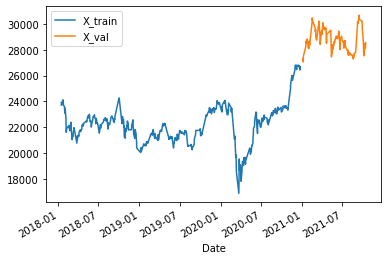

In [34]:
# 学習データと検証データの終値の折れ線グラフを作成
X_train['Close'].plot(kind='line')
X_val['Close'].plot(kind='line')

# グラフの凡例を設定
plt.legend(['X_train', 'X_val'])

# グラフの描画
plt.show()

In [35]:
# 標準化関数（StandardScaler）をインポート
from sklearn.preprocessing import StandardScaler

# numpyのインポート
import numpy as np

# 4日ごとにデータを抜き出し、標準化とnumpy配列への変換を行う関数（std_to_np）を定義
def std_to_np(df):
    df_list = []
    df = np.array(df)
    for i in range(0, len(df) -3, 4):
        df_s = df[i:i+4]
        scl = StandardScaler()
        df_std = scl.fit_transform(df_s)
        df_list.append(df_std)
    return np.array(df_list)

In [36]:
# 学習データと検証データの説明変数に関数（std_to_np）を適用
X_train_np_array = std_to_np(X_train)
X_val_np_array = std_to_np(X_val)

# 学習データと検証データの説明変数の形状を確認
print(X_train_np_array.shape)
print(X_val_np_array.shape)

(120, 4, 7)
(33, 4, 7)


In [37]:
# 学習データと検証データの目的変数を確認
print(y_train)
print(y_val)

Date
2018-01-15    1
2018-01-16    0
2018-01-17    0
2018-01-18    1
2018-01-22    1
             ..
2020-12-17    0
2020-12-21    0
2020-12-22    1
2020-12-23    1
2020-12-24    0
Name: Up, Length: 480, dtype: int64
Date
2021-01-04    0
2021-01-05    0
2021-01-06    1
2021-01-07    1
2021-01-18    1
             ..
2021-10-07    1
2021-10-11    0
2021-10-12    0
2021-10-13    1
2021-10-14    1
Name: Up, Length: 132, dtype: int64


In [38]:
# 学習データ、検証データの目的変数の間引き
# 週の4日目（木曜日）のデータだけ抜き出す
y_train_new = y_train[3::4]
y_val_new = y_val[3::4]

# 間引き後の学習データと検証データの目的変数を確認
print(len(y_train_new))
print(len(y_val_new))

120
33


In [40]:
import tensorflow as tf
# tensorflow.keras.modelsからSequentialのインポート
from tensorflow.keras.models import Sequential
# tensorflow.keras.layersからDense、LSTMのインポート
from tensorflow.keras.layers import Dense, LSTM
# tensorflow.keras.layersからDropoutのインポート
from tensorflow.keras.layers import Dropout

In [41]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [42]:
# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

In [43]:
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)
for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices], X_train_np_array[valid_indices]
    y_train, y_valid = y_train_new[train_indices], y_train_new[valid_indices]

    # LSTM構築とコンパイル関数にX_trainを渡し、変数modelに代入
    model = lstm_comp(X_train)

    # モデル学習
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # 予測
    y_valid_pred = model.predict(X_valid)

    # 予測結果の2値化
    y_valid_pred = np.where(y_valid_pred < 0.5, 0, 1)

    # 予測精度の算出と表示
    score = accuracy_score(y_valid, y_valid_pred)
    print(f'fold {fold} MAE: {score}')

    # 予測精度スコアをリストに格納
    valid_scores.append(score)
    
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'CV score: {cv_score}')

Epoch 1/10
1/1 [==============================] - 0s 27ms/step - loss: 0.6968 - accuracy: 0.3750
Epoch 2/10
1/1 [==============================] - 0s 10ms/step - loss: 0.6906 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6798 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 0s 13ms/step - loss: 0.6786 - accuracy: 0.5833
Epoch 5/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6735 - accuracy: 0.5833
Epoch 6/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6685 - accuracy: 0.5833
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.6626 - accuracy: 0.5833
Epoch 8/10
1/1 [==============================] - 0s 18ms/step - loss: 0.6520 - accuracy: 0.5833
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.6526 - accuracy: 0.5833
Epoch 10/10
1/1 [==============================] - 0s 9ms/step - loss: 0.6522 - accuracy: 0.5833
fold 0 MAE: 0.4583333333333333
Epo

In [44]:
# LSTM構築とコンパイル関数にX_train_np_arrayを渡し、変数modelに代入
model = lstm_comp(X_train_np_array)

In [45]:
# モデル学習
result = model.fit(X_train_np_array, y_train_new, epochs=10, batch_size=64)

Epoch 1/10
2/2 [==============================] - 3s 2s/step - loss: 0.6980 - accuracy: 0.5083
Epoch 2/10
2/2 [==============================] - 3s 2s/step - loss: 0.6932 - accuracy: 0.5167
Epoch 3/10
2/2 [==============================] - 4s 2s/step - loss: 0.6919 - accuracy: 0.5250
Epoch 4/10
2/2 [==============================] - 3s 2s/step - loss: 0.6900 - accuracy: 0.5750
Epoch 5/10
2/2 [==============================] - 3s 2s/step - loss: 0.6895 - accuracy: 0.5500
Epoch 6/10
2/2 [==============================] - 3s 2s/step - loss: 0.6866 - accuracy: 0.5500
Epoch 7/10
2/2 [==============================] - 3s 1s/step - loss: 0.6884 - accuracy: 0.6250
Epoch 8/10
2/2 [==============================] - 3s 2s/step - loss: 0.6850 - accuracy: 0.5917
Epoch 9/10
2/2 [==============================] - 3s 2s/step - loss: 0.6841 - accuracy: 0.5667
Epoch 10/10
2/2 [==============================] - 3s 2s/step - loss: 0.6827 - accuracy: 0.5667


In [46]:
# 作成したモデルより検証データを用いて予測
pred = model.predict(X_val_np_array)
pred[:10]

array([[0.49457124],
       [0.5219468 ],
       [0.5179097 ],
       [0.53643703],
       [0.5390639 ],
       [0.5395113 ],
       [0.4856969 ],
       [0.51427305],
       [0.48039845],
       [0.5322915 ]], dtype=float32)

In [47]:
# 予測結果を0もしくは1に変換（0.5を堺にして、1に近いほど株価が上昇、0に近いほど株価が上昇しない）
pred = np.where(pred < 0.5, 0, 1)
pred[:10]

array([[0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1]])

In [48]:
# 実際の結果から予測値の正解率を算出
print('accuracy_score: ', accuracy_score(y_true=y_val_new, y_pred=pred))

accuracy_score:  0.5454545454545454


In [49]:
# 行動行列生成のためconfusion_matrixのインポート
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

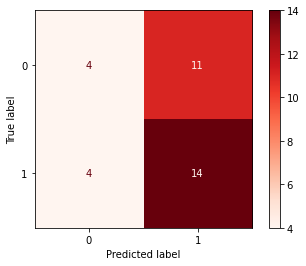

In [50]:
# 混同行列の生成
cm = confusion_matrix(y_val_new, pred)
cmp = ConfusionMatrixDisplay(cm)
cmp.plot(cmap=plt.cm.Reds)